# **Seminar VI - Big Data: Variety and veracity applications** 
- *Yeison Montoya*
- *Special Topics in Data Analytics CSIS 4260 - 002*
- *Seminar VI - WINTER 2024*

**Technologies for analyzing data variety and data veracity and lessons learned**

Users on Facebook have the freedom to express their feelings about various topics, ranging from politics to the environment. This makes Facebook an ideal platform for conducting sentiment analysis tasks and leveraging the power of social network algorithms developed through machine learning using Python. By performing sentiment analysis on Facebook posts, trends among users can be accurately identified, enabling effective management of vast amounts of information. Implementation of batch data processing makes sense in the case of high volumes of data. 


Let's begin the process of analyzing sentiments in Facebook posts through machine learning using Python. To commence, I'll import the required Python libraries and the dataset.






In [7]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import LancasterStemmer, WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import re
import unicodedata
import nltk
import json
import inflect
import matplotlib.pyplot as plt

import json
# load json into python, assign to 'data'
with open('/workspaces/Special-Topics-in-Data-Analytics-CSIS-4260-002/docs/your_posts__1.json') as file:
    data = json.load(file)
print(type(data))     # a list
print(type(data[0]))  # first object in the list: a dictionary
print(len(data))

<class 'list'>
<class 'dict'>
177


Next, we must retrieve the post descriptions to facilitate sentiment analysis. The textual content of the posts will be stored in a list for further analysis.






In [8]:
# create empty list
empty_lst = []
# multiple nested loops to store all post in empty list
for dct in data:
    for k, v in dct.items():
        if k == 'data':
            if len(v) > 0:
                for k_i, v_i in v[0].items():  
                    if k_i == 'post':
                        empty_lst.append(v_i)
print("This is the empty list: ", empty_lst)
print("\nLength of list: ", len(empty_lst))
for i in empty_lst:
  print(i)

This is the empty list:  ['QUE CANCION!!!! ESCHUCHENLA', 'http://www.proyectotaller24.blogspot.com/\n', 'QUE TEMAAAAA', 'pa rumbiar hoy dia del amor y la amistad', 'mucho tema', 'I cant believe I found this just : http://clashofclanshelper.com/ - you receive  Clash of Clans gems instantly! Everybody uses this ! (BWFS08Ck61)', 'Safe and sound! ð\x9f\x8d\x82 ð\x9f\x8d\x81ð\x9f\x8d\x82ð\x9f\x8d\x81', 'Amazing! Ive just received 100 000 free Clash of Clans gems! http://t.co/ZfSjqWIfxc', 'I cant believe I found this just : http://t.co/cXbuWexHux - you receive  Clash of Clans gems instantly! Everybody uses this ! (BWFS08Ck61)', 'Ud sabe porque se casÃ³ adonay???? Jejeje #PreguntasReinas', 'Recomendado! http://t.co/b7eUDd1bbu http://t.co/QCPIro149d', 'Utilizo avast! Free Antivirus para proteger mi PC y estoy muy satisfeco con Ã©l. PruÃ©balo en http://t.co/3TnKLQDW #avast', 'Me encanta Dropbox porque es necesario y util para compartir archivos http://t.co/V023ZjCY', 'Â¡Mira mi coche en #CSRRac

As evident from the displayed results, there is a list comprising the text content of my Facebook posts, specifically centered around topics related tofamiliar feelings.






**Data Preparation:**
Next, It will be executed tokenization on the text stored in the list.

In [9]:
nltk.download('punkt')
nested_sent_token = [nltk.sent_tokenize(lst) for lst in empty_lst]
# flatten list, len: 3241
flat_sent_token = [item for sublist in nested_sent_token for item in sublist]
print("Flatten sentence token: ", len(flat_sent_token))

Flatten sentence token:  133


[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Normalize the data**

- deleting non-ASCII characters

- lowercase all words

- suppression of punctuation

- number replacement

- stop words


Let's explore the process of developing functions to carry out the mentioned tasks for preparing data for sentiment analysis of Facebook posts.




In [10]:
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode(
            'ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# To LowerCase
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# Remove Punctuation
def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Replace Numbers with Textual Representations
def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

# Remove Stopwords
def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

# Combine all functions into Normalize() function
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words
    
nltk.download('stopwords')
sents = normalize(flat_sent_token)
print("Length of sentences list: ", len(sents))

Length of sentences list:  123


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


The analysis will focus on identifying the most frequently shared sentences to understand the predominant content in the Facebook posts.






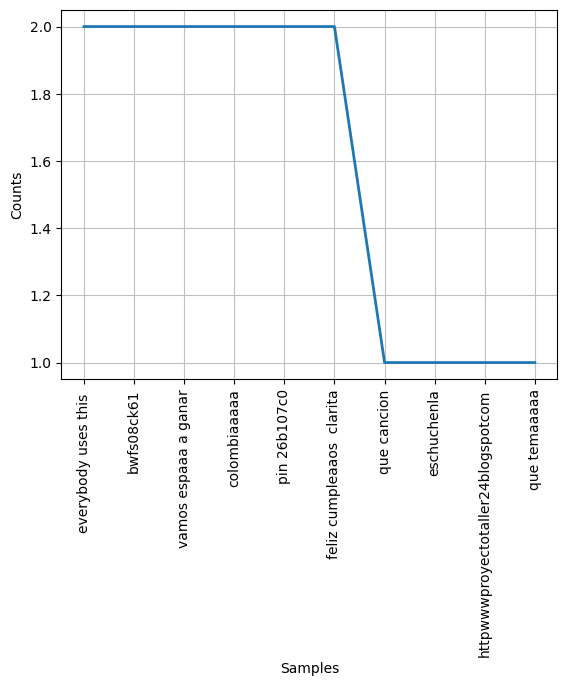

<Axes: xlabel='Samples', ylabel='Counts'>

In [11]:
from nltk.probability import FreqDist
# Find frequency of sentence
fdist_sent = FreqDist(sents)
fdist_sent.most_common(10)   
# Plot
fdist_sent.plot(10)

In the final step, the analysis involves assessing the sentiments expressed in the post descriptions, resulting in the generation of a Facebook post sentiment analysis report that categorizes sentiments as neutral, positive, or negative.







In [12]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
sentiment = []
sentiment2 = []
for sent in sents:
    sent1 = sent
    sent_scores = sid.polarity_scores(sent1)
    for x, y in sent_scores.items():
        sentiment2.append((x, y))
    sentiment.append((sent1, sent_scores))
    # print(sentiment)
# sentiment
cols = ['sentence', 'numbers']
result = pd.DataFrame(sentiment, columns=cols)
print("First five rows of results: ", result.head())
# sentiment2
cols2 = ['label', 'values']
result2 = pd.DataFrame(sentiment2, columns=cols2)
print("First five rows of results2: ", result2.head())

First five rows of results:                                     sentence  \
0                               que cancion   
1                               eschuchenla   
2        httpwwwproyectotaller24blogspotcom   
3                              que temaaaaa   
4  pa rumbiar hoy dia del amor y la amistad   

                                             numbers  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
4  {'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'comp...  
First five rows of results2:        label  values
0       neg     0.0
1       neu     1.0
2       pos     0.0
3  compound     0.0
4       neg     0.0


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
